<a href="https://colab.research.google.com/github/UtkarshAIITB/DAV-Team-Assignment/blob/main/Q1_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
covid = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DAV_assignment/WHO-COVID-19-global-data.csv')
print(covid.shape)
covid.head()

(209271, 8)


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [ ]:
for column in covid.columns:
  print('Unique values in: ' + column + 'is: ' + str(len(covid[column].unique())))

Unique values in: Date_reportedis: 883
Unique values in: Country_codeis: 237
Unique values in: Countryis: 237
Unique values in: WHO_regionis: 7
Unique values in: New_casesis: 16981
Unique values in: Cumulative_casesis: 96983
Unique values in: New_deathsis: 1695
Unique values in: Cumulative_deathsis: 32706


In [ ]:
covid.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
209266,2022-05-30,ZW,Zimbabwe,AFRO,0,251092,0,5500
209267,2022-05-31,ZW,Zimbabwe,AFRO,0,251092,0,5500
209268,2022-06-01,ZW,Zimbabwe,AFRO,0,251092,0,5500
209269,2022-06-02,ZW,Zimbabwe,AFRO,0,251092,0,5500
209270,2022-06-03,ZW,Zimbabwe,AFRO,0,251092,0,5500


In [ ]:
237*883 == covid.shape[0]
# for each country data of 883 days is given

True

In [ ]:
covid.info()
# country code contains null values and date_reported needs to be converted to date_time object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209271 entries, 0 to 209270
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      209271 non-null  object
 1   Country_code       208388 non-null  object
 2   Country            209271 non-null  object
 3   WHO_region         209271 non-null  object
 4   New_cases          209271 non-null  int64 
 5   Cumulative_cases   209271 non-null  int64 
 6   New_deaths         209271 non-null  int64 
 7   Cumulative_deaths  209271 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 12.8+ MB


In [ ]:
print(209271-208388)
# most probably code of one country is missing

883


In [ ]:
null = covid[covid.isna().any(axis=1)]
null.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
126269,2020-01-03,NaN,Namibia,AFRO,0,0,0,0
126270,2020-01-04,NaN,Namibia,AFRO,0,0,0,0
126271,2020-01-05,NaN,Namibia,AFRO,0,0,0,0
126272,2020-01-06,NaN,Namibia,AFRO,0,0,0,0
126273,2020-01-07,NaN,Namibia,AFRO,0,0,0,0


In [ ]:
print(len(null['Country'].unique()))
null.tail()
# Hence only country code of namibia is missing

1


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
127147,2022-05-30,NaN,Namibia,AFRO,67,163455,0,4037
127148,2022-05-31,NaN,Namibia,AFRO,161,163616,1,4038
127149,2022-06-01,NaN,Namibia,AFRO,258,163874,0,4038
127150,2022-06-02,NaN,Namibia,AFRO,192,164066,0,4038
127151,2022-06-03,NaN,Namibia,AFRO,0,164066,0,4038


In [ ]:
covid = covid.fillna('NA')
covid.info()
# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209271 entries, 0 to 209270
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      209271 non-null  object
 1   Country_code       209271 non-null  object
 2   Country            209271 non-null  object
 3   WHO_region         209271 non-null  object
 4   New_cases          209271 non-null  int64 
 5   Cumulative_cases   209271 non-null  int64 
 6   New_deaths         209271 non-null  int64 
 7   Cumulative_deaths  209271 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 12.8+ MB


In [ ]:
covid['Date_reported'] =  pd.to_datetime(covid['Date_reported'], format = '%Y-%m-%d')
covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209271 entries, 0 to 209270
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_reported      209271 non-null  datetime64[ns]
 1   Country_code       209271 non-null  object        
 2   Country            209271 non-null  object        
 3   WHO_region         209271 non-null  object        
 4   New_cases          209271 non-null  int64         
 5   Cumulative_cases   209271 non-null  int64         
 6   New_deaths         209271 non-null  int64         
 7   Cumulative_deaths  209271 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 12.8+ MB


In [ ]:
# converting the data into a time series
tsm = covid.set_index('Date_reported')
tsm.head()

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [ ]:
# plt.tight_layout()
# plt.plot(tsm[tsm['Country'] == 'Afghanistan'].Cumulative_cases)

In [ ]:
# tsm[tsm['Country'] == 'Afghanistan'].tail()

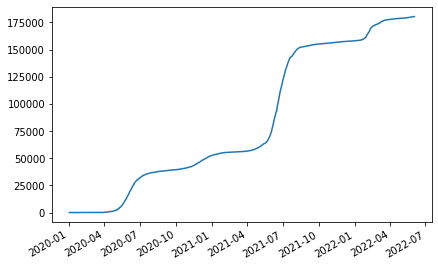

In [ ]:
figure,axis=plt.subplots()
plt.tight_layout()
## Preventing overlapping
figure.autofmt_xdate()
axis.plot(tsm[tsm['Country'] == 'Afghanistan'].Cumulative_cases)

In [ ]:
# covid['Country'].unique()

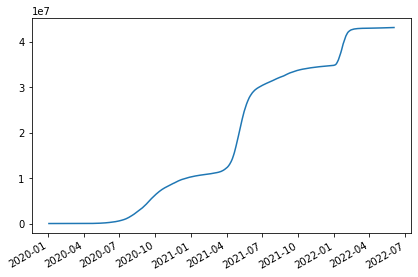

In [ ]:
figure,axis=plt.subplots()
plt.tight_layout()
## Preventing overlapping
figure.autofmt_xdate()
axis.plot(tsm[tsm['Country'] == 'India'].Cumulative_cases)

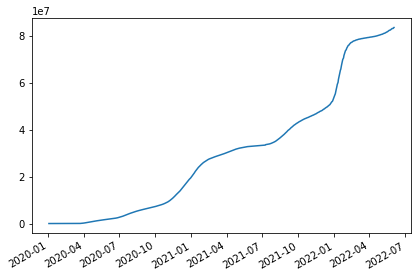

In [ ]:
# United States of America
figure,axis=plt.subplots()
plt.tight_layout()
## Preventing overlapping
figure.autofmt_xdate()
axis.plot(tsm[tsm['Country'] == 'United States of America'].Cumulative_cases)

# Questions
Q1. Percentage share of top 10 countries pie chart for total cases and deaths <br>
Q2. Month-wise share of new cases <br>
Q3. Year-wise share of total cases <br>
Q4. Yearly superposition of all three years total cases and total deaths <br>
Q5. WHO region contribution to total cases and total deaths<br>
Q6. Nature of graphs of top 6 countries yearwise combined into same

In [ ]:
tsm.head()

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


## Q1

In [ ]:
# column_names = ['Country', 'Total Cases', 'Total Deaths']
coun = pd.DataFrame()
for country in tsm['Country'].unique():
  ss = tsm[tsm['Country']==country]
  last_row = ss.tail(1)
  coun = coun.append(last_row)

In [ ]:
coun

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2022-06-03,AF,Afghanistan,EMRO,0,180419,0,7707
2022-06-03,AL,Albania,EURO,54,276275,0,3497
2022-06-03,DZ,Algeria,AFRO,2,265889,0,6875
2022-06-03,AS,American Samoa,WPRO,0,6192,0,31
2022-06-03,AD,Andorra,EURO,173,43067,0,153
...,...,...,...,...,...,...,...
2022-06-03,VN,Viet Nam,WPRO,2208,10722634,1,43080
2022-06-03,WF,Wallis and Futuna,WPRO,0,454,0,7
2022-06-03,YE,Yemen,EMRO,0,11822,0,2149


In [ ]:
cases = coun.sort_values(by = 'Cumulative_cases', ascending = False)
cases.head(10)

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2022-06-03,US,United States of America,AMRO,136522,83551386,558,998070
2022-06-03,IN,India,SEARO,4041,43168585,10,524651
2022-06-03,BR,Brazil,AMRO,40979,31060017,125,666801
2022-06-03,FR,France,EURO,25365,28687573,41,145123
2022-06-03,DE,Germany,EURO,28481,26452148,0,139313
2022-06-03,GB,The United Kingdom,EURO,0,22305897,0,178749
2022-06-03,RU,Russian Federation,EURO,4188,18343964,78,379363
2022-06-03,KR,Republic of Korea,WPRO,12542,18141835,17,24229
2022-06-03,IT,Italy,EURO,17718,17457950,79,166835


In [ ]:
fig = px.pie(cases.iloc[0:10], values = 'Cumulative_cases', names = 'Country', title = 'Top 10 Covid prone countries')
fig.update_layout(
                  font=dict( size=15),
                  title={ 'y':0.9,
                          'x':0.43,
                          'xanchor': 'center',
                          'yanchor': 'top'
                  }
                  )
fig.show()

In [ ]:
deaths = coun.sort_values(by = 'Cumulative_deaths', ascending = False)
deaths.head(10)

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2022-06-03,US,United States of America,AMRO,136522,83551386,558,998070
2022-06-03,BR,Brazil,AMRO,40979,31060017,125,666801
2022-06-03,IN,India,SEARO,4041,43168585,10,524651
2022-06-03,RU,Russian Federation,EURO,4188,18343964,78,379363
2022-06-03,MX,Mexico,AMRO,0,5779027,0,324951
2022-06-03,PE,Peru,AMRO,0,3581524,0,213205
2022-06-03,GB,The United Kingdom,EURO,0,22305897,0,178749
2022-06-03,IT,Italy,EURO,17718,17457950,79,166835
2022-06-03,ID,Indonesia,SEARO,372,6056017,4,156604


In [ ]:
fig = px.pie(deaths.iloc[0:10], values = 'Cumulative_deaths', names = 'Country', title = 'Top 10 countries by death')
fig.update_layout(
                  font=dict( size=15),
                  title={ 'y':0.9,
                          'x':0.43,
                          'xanchor': 'center',
                          'yanchor': 'top'
                  }
                  )
fig.show()

## Q2

In [ ]:
new = covid.copy()
new['month'] = pd.DatetimeIndex(new['Date_reported']).month
new.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,month
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,1
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,1
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,1
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,1
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,1


In [ ]:
new.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,month
209266,2022-05-30,ZW,Zimbabwe,AFRO,0,251092,0,5500,5
209267,2022-05-31,ZW,Zimbabwe,AFRO,0,251092,0,5500,5
209268,2022-06-01,ZW,Zimbabwe,AFRO,0,251092,0,5500,6
209269,2022-06-02,ZW,Zimbabwe,AFRO,0,251092,0,5500,6
209270,2022-06-03,ZW,Zimbabwe,AFRO,0,251092,0,5500,6


In [ ]:
monthly = new.sort_values(by = 'month').reset_index(drop = True)
monthly.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,month
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,1
1,2022-01-04,NZ,New Zealand,WPRO,58,13990,0,51,1
2,2022-01-05,NZ,New Zealand,WPRO,40,14030,0,51,1
3,2022-01-06,NZ,New Zealand,WPRO,61,14091,0,51,1
4,2022-01-07,NZ,New Zealand,WPRO,59,14150,0,51,1


In [ ]:
monthly.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,month
209266,2020-12-05,VG,British Virgin Islands,AMRO,0,73,0,1,12
209267,2020-12-04,VG,British Virgin Islands,AMRO,0,73,0,1,12
209268,2020-12-03,VG,British Virgin Islands,AMRO,0,73,0,1,12
209269,2020-12-10,VG,British Virgin Islands,AMRO,2,75,0,1,12
209270,2021-12-24,XK,Kosovo[1],EURO,4,161255,0,2979,12


In [ ]:
column_names = ['Month', 'Total Cases', 'Total Deaths']
monty = pd.DataFrame(columns = column_names)

In [ ]:
for i in monthly['month'].unique():
  cs = monthly[monthly['month'] == i]
  case = sum(cs['New_cases'])
  ded  = sum(cs['New_deaths'])
  monty.loc[i] = [i,case,ded]

In [ ]:
month_labels = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August',
                9: 'September', 10: 'October', 11: 'November', 12: 'December'}
monty['Month'] = monty['Month'].apply(lambda x: month_labels[x])
monty.head()

,Month,Total Cases,Total Deaths
1,January,109412304,674350
2,February,69831694,584245
3,March,65706323,506017
4,April,49589993,653179
5,May,39119775,590531


In [ ]:
fig = px.pie(monty, values = 'Total Cases', names = 'Month', title = 'Month-wise distribution of cases')
fig.update_layout(
                  font=dict( size=15),
                  title={ 'y':0.9,
                          'x':0.47,
                          'xanchor': 'center',
                          'yanchor': 'top'
                  }
                  )
fig.show()

In [ ]:
fig = px.pie(monty, values = 'Total Deaths', names = 'Month', title = 'Month-wise distribution of deaths')
fig.update_layout(
                  font=dict( size=15),
                  title={ 'y':0.9,
                          'x':0.47,
                          'xanchor': 'center',
                          'yanchor': 'top'
                  }
                  )
fig.show()

## Q3

In [ ]:
q3 = covid.copy()
q3['Year'] = pd.DatetimeIndex(q3['Date_reported']).year
q3.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,2020
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,2020
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,2020
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,2020
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,2020


In [ ]:
column_names = ['Year', 'Total Cases', 'Total Deaths']
yearly = pd.DataFrame(columns = column_names)

In [ ]:
for i in q3['Year'].unique():
  cs = q3[q3['Year'] == i]
  case = sum(cs['New_cases'])
  ded  = sum(cs['New_deaths'])
  yearly.loc[i] = [i,case,ded] 

In [ ]:
yearly = yearly.reset_index(drop = True)
yearly

,Year,Total Cases,Total Deaths
0,2020,82939166,1928467
1,2021,204165517,3520606
2,2022,241711634,845896


In [ ]:
yearly['Deaths by case'] = (yearly['Total Deaths']/yearly['Total Cases'])*100
yearly

,Year,Total Cases,Total Deaths,Deaths by case
0,2020,82939166,1928467,2.325158
1,2021,204165517,3520606,1.724388
2,2022,241711634,845896,0.349961


In [ ]:
fig = px.pie(yearly, values = 'Total Cases', names = 'Year', title = 'Year-wise distribution of cases')
fig.update_layout(
                  font=dict( size=15),
                  title={ 'y':0.9,
                          'x':0.47,
                          'xanchor': 'center',
                          'yanchor': 'top'
                  }
                  )
fig.show()

In [ ]:
fig = px.pie(yearly, values = 'Deaths by case', names = 'Year', title = 'Year-wise distribution of deaths')
fig.update_layout(
                  font=dict( size=15),
                  title={ 'y':0.9,
                          'x':0.47,
                          'xanchor': 'center',
                          'yanchor': 'top'
                  }
                  )
fig.show()

## Q4

In [ ]:
q4 = covid.copy()
# q4['Year'] = pd.DatetimeIndex(q4['Date_reported']).year
# q4['Month'] = pd.DatetimeIndex(q4['Date_reported']).month
q4.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [ ]:
q4_t = q4.drop(columns = ['Country_code', 'Country', 'WHO_region'])

In [ ]:
q4_t.head()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,0,0,0,0
1,2020-01-04,0,0,0,0
2,2020-01-05,0,0,0,0
3,2020-01-06,0,0,0,0
4,2020-01-07,0,0,0,0


In [ ]:
kill = q4_t.groupby(q4_t['Date_reported'].dt.date).sum()
kill.head()
# this creates a dataframe with total cases and total deaths on each day reported

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,
2020-01-03,0,0,0,0
2020-01-04,3,3,0,0
2020-01-05,0,3,0,0
2020-01-06,3,6,0,0
2020-01-07,0,6,0,0


In [ ]:
kill.shape

(883, 4)

In [ ]:
kill = kill.reset_index()
kill.head()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,0,0,0,0
1,2020-01-04,3,3,0,0
2,2020-01-05,0,3,0,0
3,2020-01-06,3,6,0,0
4,2020-01-07,0,6,0,0


In [ ]:
kill['Year'] = pd.DatetimeIndex(kill['Date_reported']).year
kill['Month'] = pd.DatetimeIndex(kill['Date_reported']).month
kill.head()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month
0,2020-01-03,0,0,0,0,2020,1
1,2020-01-04,3,3,0,0,2020,1
2,2020-01-05,0,3,0,0,2020,1
3,2020-01-06,3,6,0,0,2020,1
4,2020-01-07,0,6,0,0,2020,1


In [ ]:
kill_2020 = kill[kill.Year == 2020]
kill_2021 = kill[kill.Year == 2021]
kill_2022 = kill[kill.Year == 2022]
kill_2020.shape

(364, 7)

In [ ]:
kill_2020.head()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month
0,2020-01-03,0,0,0,0,2020,1
1,2020-01-04,3,3,0,0,2020,1
2,2020-01-05,0,3,0,0,2020,1
3,2020-01-06,3,6,0,0,2020,1
4,2020-01-07,0,6,0,0,2020,1


In [ ]:
kill_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 0 to 363
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date_reported      364 non-null    object
 1   New_cases          364 non-null    int64 
 2   Cumulative_cases   364 non-null    int64 
 3   New_deaths         364 non-null    int64 
 4   Cumulative_deaths  364 non-null    int64 
 5   Year               364 non-null    int64 
 6   Month              364 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 22.8+ KB


In [ ]:
kill_2020.loc[:,'Date_reported'] =  pd.to_datetime(kill_2020.loc[:,'Date_reported'], format = '%Y-%m-%d')
kill_2021.loc[:,'Date_reported'] =  pd.to_datetime(kill_2021.loc[:,'Date_reported'], format = '%Y-%m-%d')
kill_2022.loc[:,'Date_reported'] =  pd.to_datetime(kill_2022.loc[:,'Date_reported'], format = '%Y-%m-%d')
# kill_2020.info()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# df['column'] = df['column'].dt.strftime('%Y-%m')
kill_2020.loc[:,'Date_reported'] = kill_2020.loc[:,'Date_reported'].dt.strftime('%m-%d')
kill_2021.loc[:,'Date_reported'] = kill_2021.loc[:,'Date_reported'].dt.strftime('%m-%d')
kill_2022.loc[:,'Date_reported'] = kill_2022.loc[:,'Date_reported'].dt.strftime('%m-%d')
# kill_2020.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# kill_2020 = kill_2020.set_index('Date_reported')
# kill_2021 = kill_2021.set_index('Date_reported')
# kill_2022 = kill_2022.set_index('Date_reported')

In [ ]:
# plt.plot(kill_2020['Cumulative_cases'])
# plt.plot(kill_2021['Cumulative_cases'])
# plt.plot(kill_2022['Cumulative_cases'])
# plt.show()

In [ ]:
kill_2020.head()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month
0,01-03,0,0,0,0,2020,1
1,01-04,3,3,0,0,2020,1
2,01-05,0,3,0,0,2020,1
3,01-06,3,6,0,0,2020,1
4,01-07,0,6,0,0,2020,1


In [ ]:
kill_2021.head()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month
364,01-01,743521,83682687,13735,1942202,2021,1
365,01-02,648314,84331001,12318,1954520,2021,1
366,01-03,556423,84887424,10912,1965432,2021,1
367,01-04,579077,85466501,10185,1975617,2021,1
368,01-05,582707,86049208,10857,1986474,2021,1


In [ ]:
# cum_total  = inning.loc[:,'total_runs_x'].cumsum(axis = 0)
cum_case = kill_2021.loc[:,'New_cases'].cumsum(axis = 0)
kill_2021.loc[:,'cum_case'] = cum_case
# kill_2021.head()
cum_case = kill_2022.loc[:,'New_cases'].cumsum(axis = 0)
kill_2022.loc[:,'cum_case'] = cum_case
# kill_2022.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# plt.figure(figsize=(20,10))
# plt.tight_layout()
# # plt.gcf().autofmt_xdate()
# plt.plot(kill_2020['Cumulative_cases'])
# # plt.plot(kill_2021['cum_case'])
# # plt.plot(kill_2022['cum_case'])
# plt.show()

In [ ]:
# kill_2021.head()
print(kill_2020.shape)
print(kill_2021.shape)
print(kill_2022.shape)

(364, 7)
(365, 8)
(154, 8)


In [ ]:
# fig = px.line(kill_2021, x="Date_reported", y="cum_case", title='Life expectancy in Canada')
# fig.show()

In [ ]:
kill_2022.head()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month,cum_case
729,01-01,1978469,289083152,6288,5455361,2022,1,1978469
730,01-02,1639221,290722373,4964,5460325,2022,1,3617690
731,01-03,1140778,291863151,4172,5464497,2022,1,4758468
732,01-04,1453116,293316267,4844,5469341,2022,1,6211584
733,01-05,2634774,295951041,7421,5476762,2022,1,8846358


In [ ]:
kill_2020.head()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month
0,01-03,0,0,0,0,2020,1
1,01-04,3,3,0,0,2020,1
2,01-05,0,3,0,0,2020,1
3,01-06,3,6,0,0,2020,1
4,01-07,0,6,0,0,2020,1


In [ ]:
# df['Date'] = pd.to_numeric(df.Date.str.replace('-',''))
kill_2020.loc[:,'Date_reported'] = pd.to_numeric(kill_2020.loc[:,'Date_reported'].str.replace('-','.'))
kill_2021.loc[:,'Date_reported'] = pd.to_numeric(kill_2021.loc[:,'Date_reported'].str.replace('-','.'))
kill_2022.loc[:,'Date_reported'] = pd.to_numeric(kill_2022.loc[:,'Date_reported'].str.replace('-','.'))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
kill_2020.head()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month
0,1.03,0,0,0,0,2020,1
1,1.04,3,3,0,0,2020,1
2,1.05,0,3,0,0,2020,1
3,1.06,3,6,0,0,2020,1
4,1.07,0,6,0,0,2020,1


In [ ]:
# covid.head()

In [ ]:
# kill_2020['true_date'] = kill_2020['Month'] + (kill_2020['Date_reported']*100 - 100*kill_2020['Month'])/30
# kill_2021['true_date'] = kill_2021['Month'] + (kill_2021['Date_reported']*100 - 100*kill_2021['Month'])/30
# kill_2022['true_date'] = kill_2022['Month'] + (kill_2022['Date_reported']*100 - 100*kill_2022['Month'])/30
# kill_2020.head()

In [ ]:
# plt.style.use('seaborn-white')
# plt.figure(figsize=(15,7))
# plt.tight_layout()
# # plt.gcf().autofmt_xdate()
# plt.plot(kill_2020['true_date'],kill_2020['Cumulative_cases'])
# plt.plot(kill_2021['true_date'],kill_2021['cum_case'])
# plt.plot(kill_2022['true_date'],kill_2022['cum_case'])
# plt.legend( [ '2020' ,'2021', '2022'])
# plt.xlabel('Months')
# plt.ylabel('Cases (in 10^8)')
# plt.show()

In [ ]:
kill_2020.loc[:,'true_date'] = kill_2020.loc[:,'Month'] + (kill_2020.loc[:,'Date_reported']*100 - 100*kill_2020.loc[:,'Month'])/30
kill_2021.loc[:,'true_date'] = kill_2021.loc[:,'Month'] + (kill_2021.loc[:,'Date_reported']*100 - 100*kill_2021.loc[:,'Month'])/30
kill_2022.loc[:,'true_date'] = kill_2022.loc[:,'Month'] + (kill_2022.loc[:,'Date_reported']*100 - 100*kill_2022.loc[:,'Month'])/30
kill_2020.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month,true_date
0,1.03,0,0,0,0,2020,1,1.100000
1,1.04,3,3,0,0,2020,1,1.133333
2,1.05,0,3,0,0,2020,1,1.166667
3,1.06,3,6,0,0,2020,1,1.200000
4,1.07,0,6,0,0,2020,1,1.233333


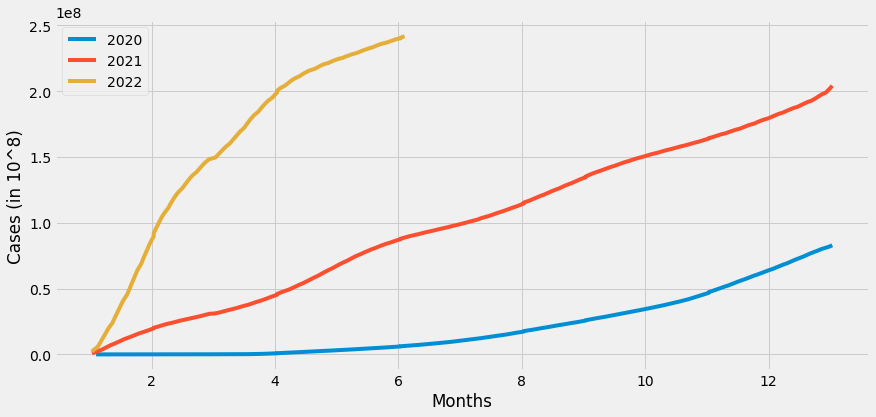

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,6))
plt.tight_layout()
# plt.gcf().autofmt_xdate()
plt.plot(kill_2020['true_date'],kill_2020['Cumulative_cases'])
plt.plot(kill_2021['true_date'],kill_2021['cum_case'])
plt.plot(kill_2022['true_date'],kill_2022['cum_case'])
plt.legend( [ '2020' ,'2021', '2022'])
plt.xlabel('Months')
plt.ylabel('Cases (in 10^8)')
plt.savefig('month_cases.png')
plt.show()

In [ ]:
kill_2021.head()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month,cum_case,true_date
364,1.01,743521,83682687,13735,1942202,2021,1,743521,1.033333
365,1.02,648314,84331001,12318,1954520,2021,1,1391835,1.066667
366,1.03,556423,84887424,10912,1965432,2021,1,1948258,1.100000
367,1.04,579077,85466501,10185,1975617,2021,1,2527335,1.133333
368,1.05,582707,86049208,10857,1986474,2021,1,3110042,1.166667


In [ ]:
cum_death = kill_2021.loc[:,'New_deaths'].cumsum(axis = 0)
kill_2021.loc[:,'cum_death'] = cum_death
# kill_2021.head()
cum_death = kill_2022.loc[:,'New_deaths'].cumsum(axis = 0)
kill_2022.loc[:,'cum_death'] = cum_death

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



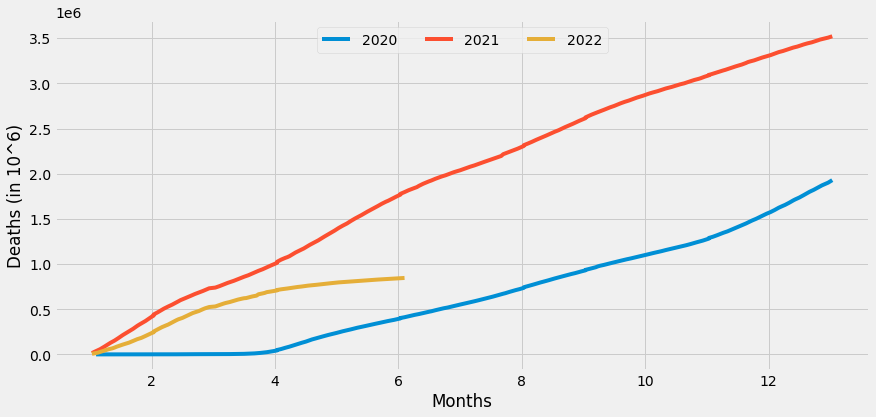

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,6))
plt.tight_layout()
# plt.gcf().autofmt_xdate()
plt.plot(kill_2020['true_date'],kill_2020['Cumulative_deaths'])
plt.plot(kill_2021['true_date'],kill_2021['cum_death'])
plt.plot(kill_2022['true_date'],kill_2022['cum_death'])
plt.legend( [ '2020' ,'2021', '2022'], ncol=3, loc = 'upper center')
plt.xlabel('Months')
plt.ylabel('Deaths (in 10^6)')
plt.savefig('month_deaths.png')
plt.show()


## Q5

In [ ]:
covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [ ]:
covid['WHO_region'].unique()

array(['EMRO', 'EURO', 'AFRO', 'WPRO', 'AMRO', 'SEARO', 'Other'],
      dtype=object)

In [ ]:
# import plotly.express as px
# fig = px.line(covid, x="Date_reported", y="Cumulative_cases", color='WHO_region')
# fig.show()

In [ ]:
q5 = covid.copy()
q5_t = q5.drop(columns = ['Country_code', 'Country'])
q5_t = q5_t.groupby(q4_t['Date_reported'].dt.date).sum()
q5_t.shape

(883, 4)

In [ ]:
# q5_t.head()

In [ ]:
overall = pd.DataFrame()
for region in covid['WHO_region'].unique():
  q5 = covid[covid['WHO_region'] == region]
  q5_t = q5.drop(columns = ['Country_code', 'Country', 'WHO_region'])
  q5_t = q5_t.groupby(q4_t['Date_reported'].dt.date).sum()
  q5_t['WHO_region'] = region
  q5_t = q5_t.reset_index()
  # overall = [overall, q5_t]
  overall = overall.append(q5_t, ignore_index = True)

In [ ]:
overall.shape

(6181, 6)

In [ ]:
overall.head()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,WHO_region
0,2020-01-03,0,0,0,0,EMRO
1,2020-01-04,0,0,0,0,EMRO
2,2020-01-05,0,0,0,0,EMRO
3,2020-01-06,0,0,0,0,EMRO
4,2020-01-07,0,0,0,0,EMRO


In [ ]:
import plotly.express as px
fig = px.line(overall, x="Date_reported", y="Cumulative_cases", color='WHO_region')
fig.show()

In [ ]:
import plotly.express as px
fig = px.line(overall, x="Date_reported", y="Cumulative_deaths", color='WHO_region')
fig.show()

## Q6

In [ ]:
covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [ ]:
cases.head()
lesgo = cases.reset_index(drop = True)

In [ ]:
lesgo['Country'].iloc[0:6]

0    United States of America
1                       India
2                      Brazil
3                      France
4                     Germany
5          The United Kingdom
Name: Country, dtype: object

In [ ]:
for country in lesgo['Country'].iloc[0:6]:
  print(country)

United States of America
India
Brazil
France
Germany
The United Kingdom


In [ ]:
c = pd.DataFrame()
q6 = covid.copy()
for country in lesgo['Country'].iloc[0:6]:
   q6_c = q6[q6['Country'] == country]
  #  fig = px.line(q6_c, x="Date_reported", y="Cumulative_cases", color='WHO_region')
  #  fig.show()
   c = c.append(q6_c, ignore_index = True)

In [ ]:
c.shape

(5298, 8)

In [ ]:
c.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,US,United States of America,AMRO,0,0,0,0
1,2020-01-04,US,United States of America,AMRO,0,0,0,0
2,2020-01-05,US,United States of America,AMRO,0,0,0,0
3,2020-01-06,US,United States of America,AMRO,0,0,0,0
4,2020-01-07,US,United States of America,AMRO,0,0,0,0


In [ ]:
fig = px.line(c, x="Date_reported", y="Cumulative_cases", color='Country')
fig.show()